This script evaluates the DEFAME variants/models that are evaluated on the gaza-israel dataset. It combines the DEFAME outputs that are saved in the DEFAME/out folder and the results from my own qualitative analyses. The output folders for each model variant are copied from the DEFAME output folder in this evaluation folder for a better overview. The results from the qualitative analyses were documented in Notion and stored in csv files to easily import them here.



#### 1) Evaluation: Model Nr.1 (All 4 Labels): 

- Model 1, Run 1, Folder name in DEFAME/out directory: 2025-08-07_18-45 default

- Original folder path in DEFAME out directory: "Practical Implementation/DEFAME/out/ukraine_russia/ukraine_russia/summary/dynamic/gemini-2.0-flash-lite/2025-08-07_18-45 default"

- New folder path with a copy of the original folder: "Practical Implementation/evaluation/ukraine_russia/model1_run1/DEFAME_output/2025-08-07_18-45 default"

In [1]:
## import relevant libraries

import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_fscore_support

##### 1.1) Show model configuration 

In [3]:
##### 1.1) Show model configuration


with open('model1_run1/DEFAME_output/2025-08-07_18-45 default/config.yaml', 'r') as file:
    content = file.read()
    print(content)

allowed_actions:
- web_search
- image_search
- reverse_search
- geolocate
benchmark_kwargs:
  variant: dev
benchmark_name: ukraine_russia
continue_experiment_dir: null
experiment_name: default
fact_checker_kwargs:
  decompose: false
  decontextualize: false
  filter_check_worthy: false
  interpret: false
  max_iterations: 3
  max_result_len: 64000
  procedure_variant: summary/dynamic
llm: gemini-2.0-flash-lite
llm_kwargs:
  temperature: 0.01
n_samples: null
n_workers: 1
print_log_level: info
random_sampling: false
sample_ids: null
tools_config:
  geolocator: null
  searcher:
    limit_per_search: 3
    search_engine_config:
      google: null
      google_vision: null



- Note: The variant is set to "dev" in the benchmark_kwargs parameter although the dataset is a test set and not a dev set. This is due to the fact that the original DEFAME implementation only creates the confusion matrix (seen below) for "dev" datasets. Since the confusion matrix is necessary to qualitative analyze the mispredictions of the model and I didn't want to adjust the entire code, I'm using this parameter value. 

##### 1.2) Show results: 

a) confusion matrix



![Confusion_matrix](model1_run1/DEFAME_output/2025-08-07_18-45%20default/confusion.png)

b) evaluation metrics

In [4]:
## b) evaluation metrics

# Open and read the JSON file with model results
with open('model1_run1/DEFAME_output/2025-08-07_18-45 default/results.json', 'r') as file:
    model_results = json.load(file)
    # for key in model_results.keys():
    #     print(key)

# Print the data in a readable format
print(json.dumps(model_results, indent=4))

{
    "Number of workers": 1,
    "Total run duration": 9300.720346450806,
    "Time per claim": 117.56708142727236,
    "Model": {
        "Calls": 910,
        "Input tokens": 4864389.0,
        "Output tokens": 97553,
        "Input tokens cost": 0.36482917499999823,
        "Output tokens cost": 0.029265899999997,
        "Total cost": 0.3940950749999979
    },
    "Tools": {
        "searcher": {
            "Total searches": 142,
            "Search engine calls": {
                "google": 129,
                "google_vision": 13
            }
        }
    },
    "Predictions": {
        "Total": 79,
        "Refused": 0,
        "Metrics": {
            "FALSE_Precision": 0.846,
            "FALSE_Recall": 0.623,
            "FALSE_F1_Score": 0.717,
            "MISLEADING_Precision": 0.474,
            "MISLEADING_Recall": 0.6,
            "MISLEADING_F1_Score": 0.529,
            "NEI_Precision": 0.0,
            "NEI_Recall": 0.0,
            "NEI_F1_Score": 0.0,
         

- Note: The listed model costs are rough estimates based on the default DEFAME calculations. They are mainly based on OpenAI's token counts and calculations and not on Google's. I have not updated it, because I'm getting the model costs on the Google Cloud Console anyway. I will report the actual costs per evaluated model variant in the thesis. 

##### 1.3) Concatenate/merge the csv with the model prediction results ("predictions_csv") with the final ukraine_russia dataset.  

In [5]:
## import model prediction results

df_model_prediction_results = pd.read_csv("model1_run1/DEFAME_output/2025-08-07_18-45 default/predictions.csv")
print(len(df_model_prediction_results))
print(df_model_prediction_results.dtypes)
df_model_prediction_results.head()

79
sample_index         int64
claim               object
target              object
predicted           object
justification       object
correct               bool
gt_justification    object
dtype: object


,sample_index,claim,target,predicted,justification,correct,gt_justification
0,0,<image:1> This image shows a screenshot of an ...,FALSE,FALSE,The claim is false. While the Hull Daily Mail ...,True,But the supposed Hull Daily Mail headline blas...
1,1,Ukrainian President Volodymyr Zelenskyy purcha...,FALSE,FALSE,The claim is false. Fact-checks from aol.com a...,True,The Eagle's Nest is in the property of the sta...
2,2,In February 2025 Ukrainian President Volodymyr...,FALSE,FALSE,The evidence indicates that Donald Trump used ...,True,A spokesperson for Trump Media and Technology ...
3,3,<image:2> This image shows a screenshot of an ...,FALSE,FALSE,The image of The Economist cover depicting Tru...,True,"However, The Economist does list Telegram amon..."
4,4,<image:3> This image shows the coffins of 18 B...,FALSE,FALSE,"The claim is false. Multiple sources, includin...",True,A reverse image search and keyword searches on...


In [6]:
## import final dataset 

df_ukraine_russia_final = pd.read_csv("../../DEFAME/data/ukraine_russia/ukraine_russia_dataset_combined_010724_300425_final.csv")
print(len(df_ukraine_russia_final))
print(df_ukraine_russia_final.columns)
print(df_ukraine_russia_final.dtypes)
df_ukraine_russia_final.head()

79
Index(['Unnamed: 0', 'id', 'Website', 'Article_URL', 'Headline', 'Claim_Date',
       'Review_Date', 'Query/Keyword', 'Original_Claim_Website',
       'Original_Claim_Only', 'Claim', 'Image_URL', 'Image_Path',
       'Label_Website', 'Label', 'Context/Label_Explanation',
       'Text_Only_Claim', 'Normal_Image', 'AI_Generated_Image',
       'Altered_Image', 'Data_Collection_Type'],
      dtype='object')
Unnamed: 0                    int64
id                            int64
Website                      object
Article_URL                  object
Headline                     object
Claim_Date                   object
Review_Date                  object
Query/Keyword                object
Original_Claim_Website       object
Original_Claim_Only          object
Claim                        object
Image_URL                    object
Image_Path                   object
Label_Website                object
Label                        object
Context/Label_Explanation    object
Text_Only_Clai

,Unnamed: 0,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,...,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
0,0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.372Y6CV,Fake newspaper cover on Ukrainian soldiers in ...,2025-03-15 00:00:00,2025-03-19 00:00:00,"""War in Ukraine""","""The Kursk expedition was a disaster and a com...","""70,000 Ukrainian soldiers in the Kursk region...",...,https://web.archive.org/web/20250708170622/htt...,images/ukraine_russia/0.jpg,altered,False,But the supposed Hull Daily Mail headline blas...,False,False,False,True,Manual
1,1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36YR9KZ,"No, Zelensky hasn't bought Eagle's Nest, it is...",2025-02-18 00:00:00,2025-02-27 00:00:00,"""War in Ukraine""","According to the latest claims, Zelensky alleg...","According to the latest claims, Zelensky alleg...",...,NaN,NaN,FALSE,False,The Eagle's Nest is in the property of the sta...,True,False,False,False,Manual
2,2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36YC3DG,Claims that Ukraine banned Truth Social are false,2025-02-20 00:00:00,2025-02-21 00:00:00,"""War in Ukraine""","""BREAKING: Zelensky blocks access to President...","""BREAKING: Zelensky blocks access to President...",...,NaN,NaN,FALSE,False,A spokesperson for Trump Media and Technology ...,True,False,False,False,Manual
3,3,3,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36P98ZW,Fake 'apocalypse' cover of The Economist circu...,2024-11-18 00:00:00,2024-12-03 00:00:00,"""War in Ukraine""","""APOCALYPSE: Allowing missile strikes deep int...","""APOCALYPSE: Allowing missile strikes deep int...",...,https://web.archive.org/web/20250708170927/htt...,images/ukraine_russia/3.jpg,FALSE,False,"However, The Economist does list Telegram amon...",False,False,False,True,Manual
4,4,4,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36MM6QY,Old photo misrepresented as coffins of 'Britis...,2024-11-03 00:00:00,2024-11-27 00:00:00,"""War in Ukraine""","""Recently, 18 members of the British special f...","""18 British Special Forces were killed in Ukra...",...,https://web.archive.org/web/20250708171047/htt...,images/ukraine_russia/4.jpg,FALSE,False,A reverse image search and keyword searches on...,False,True,False,False,Manual


In [ ]:
## Checking, whether all claims have predictions -> YES

# Get the set of ids in each df
ids_final = set(df_ukraine_russia_final['id'])
ids_model = set(df_model_prediction_results['sample_index'])

# Find which id is in final but NOT in model predictions
missing_id = ids_final - ids_model

print("Missing id (from model predictions):", missing_id)

Missing id (from model predictions): set()


In [8]:
# Columns that are necessary from df with model prediction results: "predicted", "justification", "correct"

## 1) Rename the id column in df_model_prediction_results for merge/inner join

df_model_prediction_results_renamed = df_model_prediction_results.rename(columns={"sample_index": "id"})
#print(df_model_prediction_results.dtypes)


## 2) Perform the inner join

df_ukraine_russia_merged = pd.merge(df_ukraine_russia_final, df_model_prediction_results_renamed[['id', 'predicted', 'justification', 'correct']], on = "id", how = "inner")
df_ukraine_russia_merged.head()



,Unnamed: 0,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,...,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,predicted,justification,correct
0,0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.372Y6CV,Fake newspaper cover on Ukrainian soldiers in ...,2025-03-15 00:00:00,2025-03-19 00:00:00,"""War in Ukraine""","""The Kursk expedition was a disaster and a com...","""70,000 Ukrainian soldiers in the Kursk region...",...,False,But the supposed Hull Daily Mail headline blas...,False,False,False,True,Manual,FALSE,The claim is false. While the Hull Daily Mail ...,True
1,1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36YR9KZ,"No, Zelensky hasn't bought Eagle's Nest, it is...",2025-02-18 00:00:00,2025-02-27 00:00:00,"""War in Ukraine""","According to the latest claims, Zelensky alleg...","According to the latest claims, Zelensky alleg...",...,False,The Eagle's Nest is in the property of the sta...,True,False,False,False,Manual,FALSE,The claim is false. Fact-checks from aol.com a...,True
2,2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36YC3DG,Claims that Ukraine banned Truth Social are false,2025-02-20 00:00:00,2025-02-21 00:00:00,"""War in Ukraine""","""BREAKING: Zelensky blocks access to President...","""BREAKING: Zelensky blocks access to President...",...,False,A spokesperson for Trump Media and Technology ...,True,False,False,False,Manual,FALSE,The evidence indicates that Donald Trump used ...,True
3,3,3,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36P98ZW,Fake 'apocalypse' cover of The Economist circu...,2024-11-18 00:00:00,2024-12-03 00:00:00,"""War in Ukraine""","""APOCALYPSE: Allowing missile strikes deep int...","""APOCALYPSE: Allowing missile strikes deep int...",...,False,"However, The Economist does list Telegram amon...",False,False,False,True,Manual,FALSE,The image of The Economist cover depicting Tru...,True
4,4,4,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36MM6QY,Old photo misrepresented as coffins of 'Britis...,2024-11-03 00:00:00,2024-11-27 00:00:00,"""War in Ukraine""","""Recently, 18 members of the British special f...","""18 British Special Forces were killed in Ukra...",...,False,A reverse image search and keyword searches on...,False,True,False,False,Manual,FALSE,"The claim is false. Multiple sources, includin...",True


##### 1.4) Analysis of wrong predictions of the model

1.4.1) Quantitative Analysis

1.4.2) Qualitative Analysis

#### 2) Evaluation: Model Nr.1 (Aggregate 4 Labels into 2 Labels (True vs. False)): 

- Model 1, Run 1, Folder name in DEFAME/out directory: 2025-08-07_18-45 default

#### 2.1) Quantitative Analysis

1) Aggregate Ground Truth Labels & Predictions in Two Labels (Binary classification):

    - True -> True
    - False/Misleading/NEI -> False 


2) Evaluation Metrics for Binary Classification

    - Create new Confusion Matrix
    - Accuracy
    - Precision
    - Recall
    - F1
    - ROC/AUC Curve
    - False Positive Rate 

3) Evaluation Metrics per Claim Type, Fact-Checking Website

4) Interpretation of Evaluation Metrics

5) Compare evaluation metrics/results of 4 labels vs 2 labelss

In [9]:
df_ukraine_russia_merged.head()

,Unnamed: 0,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,...,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,predicted,justification,correct
0,0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.372Y6CV,Fake newspaper cover on Ukrainian soldiers in ...,2025-03-15 00:00:00,2025-03-19 00:00:00,"""War in Ukraine""","""The Kursk expedition was a disaster and a com...","""70,000 Ukrainian soldiers in the Kursk region...",...,False,But the supposed Hull Daily Mail headline blas...,False,False,False,True,Manual,FALSE,The claim is false. While the Hull Daily Mail ...,True
1,1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36YR9KZ,"No, Zelensky hasn't bought Eagle's Nest, it is...",2025-02-18 00:00:00,2025-02-27 00:00:00,"""War in Ukraine""","According to the latest claims, Zelensky alleg...","According to the latest claims, Zelensky alleg...",...,False,The Eagle's Nest is in the property of the sta...,True,False,False,False,Manual,FALSE,The claim is false. Fact-checks from aol.com a...,True
2,2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36YC3DG,Claims that Ukraine banned Truth Social are false,2025-02-20 00:00:00,2025-02-21 00:00:00,"""War in Ukraine""","""BREAKING: Zelensky blocks access to President...","""BREAKING: Zelensky blocks access to President...",...,False,A spokesperson for Trump Media and Technology ...,True,False,False,False,Manual,FALSE,The evidence indicates that Donald Trump used ...,True
3,3,3,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36P98ZW,Fake 'apocalypse' cover of The Economist circu...,2024-11-18 00:00:00,2024-12-03 00:00:00,"""War in Ukraine""","""APOCALYPSE: Allowing missile strikes deep int...","""APOCALYPSE: Allowing missile strikes deep int...",...,False,"However, The Economist does list Telegram amon...",False,False,False,True,Manual,FALSE,The image of The Economist cover depicting Tru...,True
4,4,4,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36MM6QY,Old photo misrepresented as coffins of 'Britis...,2024-11-03 00:00:00,2024-11-27 00:00:00,"""War in Ukraine""","""Recently, 18 members of the British special f...","""18 British Special Forces were killed in Ukra...",...,False,A reverse image search and keyword searches on...,False,True,False,False,Manual,FALSE,"The claim is false. Multiple sources, includin...",True


In [10]:
df_ukraine_russia_merged.dtypes

Unnamed: 0                    int64
id                            int64
Website                      object
Article_URL                  object
Headline                     object
Claim_Date                   object
Review_Date                  object
Query/Keyword                object
Original_Claim_Website       object
Original_Claim_Only          object
Claim                        object
Image_URL                    object
Image_Path                   object
Label_Website                object
Label                        object
Context/Label_Explanation    object
Text_Only_Claim                bool
Normal_Image                   bool
AI_Generated_Image             bool
Altered_Image                  bool
Data_Collection_Type         object
predicted                    object
justification                object
correct                        bool
dtype: object

In [11]:
## 1) Create two new columns with aggregated labels for ground truth labels and predictions 


# Aggregation of GT label
df_ukraine_russia_merged["Label_Aggregated_Binary"] = np.where(
    df_ukraine_russia_merged["Label"] == "True",
    "True",
    "False"
)


# check that aggregation was successful
print(df_ukraine_russia_merged.groupby("Label")["Label_Aggregated_Binary"].value_counts())


# Aggregation of predictions
df_ukraine_russia_merged["Prediction_Aggregated_Binary"] = np.where(
    df_ukraine_russia_merged["predicted"] == "TRUE",
    "True",
    "False"
)

# check that aggregation was successful
df_ukraine_russia_merged.groupby("predicted")["Prediction_Aggregated_Binary"].value_counts()




Label       Label_Aggregated_Binary
False       False                      53
Misleading  False                      15
NEI         False                       2
True        True                        9
Name: count, dtype: int64


predicted   Prediction_Aggregated_Binary
FALSE       False                           39
MISLEADING  False                           19
NEI         False                            8
TRUE        True                            13
Name: count, dtype: int64

Unique values in y_true: ['False', 'True']
Unique values in y_pred: ['False', 'True']


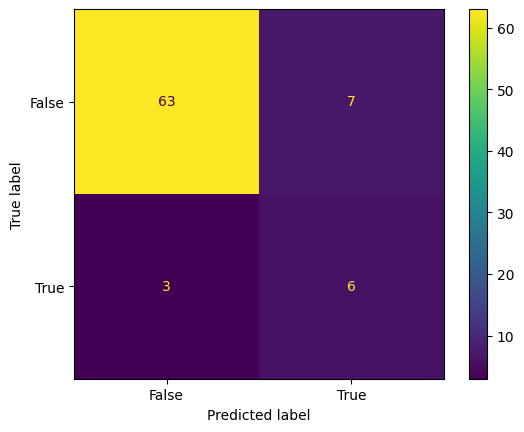

In [12]:
## 2) Evaluation metrics for binary classification 

## 2.1) Create Confusion Matrix

y_true = df_ukraine_russia_merged["Label_Aggregated_Binary"]
y_pred = df_ukraine_russia_merged["Prediction_Aggregated_Binary"]

# Check label order in my dataset for correct label display in confusion matrix below
print("Unique values in y_true:", sorted(y_true.unique()))
print("Unique values in y_pred:", sorted(y_pred.unique()))

cm = confusion_matrix(y_true, y_pred)


cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])

cm_display.plot()

plt.show()


- True Positive = 6
- True Negative = 63
- False Positive = 7
- False Negative = 3

- Sources: 
    - https://www.w3schools.com/python/python_ml_confusion_matrix.asp
    - https://www.geeksforgeeks.org/machine-learning/confusion-matrix-machine-learning/
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html



In [13]:
## Evaluation metrics per claim type (text-only claims, claims with normal image, claims with AI image, claims with altered image) and website
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define function to compute metrics
def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, pos_label="True", zero_division=0),
        "Recall": recall_score(y_true, y_pred, pos_label="True", zero_division=0),
        "F1-Score": f1_score(y_true, y_pred, pos_label="True", zero_division=0)
    }

# Create list to store results
results = []

# Group by claim types and compute metrics
for col in ["Text_Only_Claim", "Normal_Image", "AI_Generated_Image", "Altered_Image"]:
    mask = df_ukraine_russia_merged[col] == True
    if mask.any():  # Only process if there are matching rows
        y_true = df_ukraine_russia_merged.loc[mask, "Label_Aggregated_Binary"]
        y_pred = df_ukraine_russia_merged.loc[mask, "Prediction_Aggregated_Binary"]

        metrics = compute_metrics(y_true, y_pred)
        metrics["Group"] = col
        results.append(metrics)

# Also group by Website
for website in df_ukraine_russia_merged["Website"].dropna().unique():
    mask = df_ukraine_russia_merged["Website"] == website
    if mask.any():
        y_true = df_ukraine_russia_merged.loc[mask, "Label_Aggregated_Binary"]
        y_pred = df_ukraine_russia_merged.loc[mask, "Prediction_Aggregated_Binary"]

        metrics = compute_metrics(y_true, y_pred)
        metrics["Group"] = f"{website}"
        results.append(metrics)

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)



    Accuracy  Precision    Recall  F1-Score              Group
0   0.830189   0.454545  0.625000  0.526316    Text_Only_Claim
1   1.000000   1.000000  1.000000  1.000000       Normal_Image
2   0.888889   0.000000  0.000000  0.000000      Altered_Image
3   1.000000   0.000000  0.000000  0.000000      AFP Factcheck
4   0.909091   0.000000  0.000000  0.000000            Reuters
5   0.600000   0.571429  0.571429  0.571429             Snopes
6   1.000000   0.000000  0.000000  0.000000         Politifact
7   1.000000   1.000000  1.000000  1.000000         misbar.com
8   0.818182   0.000000  0.000000  0.000000  checkyourfact.com
9   0.000000   0.000000  0.000000  0.000000     newschecker.in
10  1.000000   1.000000  1.000000  1.000000       newsweek.com
11  1.000000   0.000000  0.000000  0.000000        rappler.com
12  1.000000   0.000000  0.000000  0.000000       usatoday.com


Interesting patterns:

- Claim Types:
    - Text_Only_Claims: very low precision & low F1-Score
    - Normal_Image: Accuracy, Precision & Recall = 1? How is this possible?
    - Altered_Image -> better performance than on gaza-israel dataset (model1_run1)


- Websites:
    - Snopes (ukraine-russia) <-> Snopes (gaza-ukraine)
    - checkyourfact.com -> similar pattern as in gaza-ukraine (but better accuracy)



In [21]:
## Look at claim type and fact-checking website for wrong predictions (False Positives, n = 7; False Negatives, n = 3)

# 1) Filter out False Positives

false_positives_ukraine_russia = df_ukraine_russia_merged[(df_ukraine_russia_merged["Label_Aggregated_Binary"] == "False") & 
                      (df_ukraine_russia_merged["Prediction_Aggregated_Binary"] == "True")]

print(f"Number of False Positives:")
print(len(false_positives_ukraine_russia))


# 2) Filter out False Negatives 

false_negatives_ukraine_russia = df_ukraine_russia_merged[(df_ukraine_russia_merged["Label_Aggregated_Binary"] == "True") & 
                      (df_ukraine_russia_merged["Prediction_Aggregated_Binary"] == "False")]

print(f"Number of False Negatives:")
print(len(false_negatives_ukraine_russia))



# 3) Claim type & fact-checking website

# 3.1) False Positives

print(f"----------- Analysis of False Positives ------------")
print(false_positives_ukraine_russia["Text_Only_Claim"].value_counts())
print(false_positives_ukraine_russia["Normal_Image"].value_counts())
print(false_positives_ukraine_russia["AI_Generated_Image"].value_counts())
print(false_positives_ukraine_russia["Altered_Image"].value_counts())

print(false_positives_ukraine_russia["Website"].value_counts())


# 3.2) False Negatives

print(f"\n")
print(f"----------- Analysis of False Negatives ------------")
print(false_negatives_ukraine_russia["Text_Only_Claim"].value_counts())
print(false_negatives_ukraine_russia["Normal_Image"].value_counts())
print(false_negatives_ukraine_russia["AI_Generated_Image"].value_counts())
print(false_negatives_ukraine_russia["Altered_Image"].value_counts())

print(false_negatives_ukraine_russia["Website"].value_counts())


Number of False Positives:
7
Number of False Negatives:
3
----------- Analysis of False Positives ------------
Text_Only_Claim
True     6
False    1
Name: count, dtype: int64
Normal_Image
False    7
Name: count, dtype: int64
AI_Generated_Image
False    7
Name: count, dtype: int64
Altered_Image
False    6
True     1
Name: count, dtype: int64
Website
Snopes               3
checkyourfact.com    2
Reuters              1
newschecker.in       1
Name: count, dtype: int64


----------- Analysis of False Negatives ------------
Text_Only_Claim
True    3
Name: count, dtype: int64
Normal_Image
False    3
Name: count, dtype: int64
AI_Generated_Image
False    3
Name: count, dtype: int64
Altered_Image
False    3
Name: count, dtype: int64
Website
Snopes    3
Name: count, dtype: int64


- Almost all wrong predictions (9 of 10) are text-only claims 

- 6 of 10 wrong predictions are claims from the website "Snopes"

In [ ]:
# How many claims in the dataset are from Snopes?
df_ukraine_russia_merged["Website"].value_counts()

Website
Snopes               15
AFP Factcheck        12
misbar.com           12
Reuters              11
checkyourfact.com    11
Politifact            8
newsweek.com          5
rappler.com           3
newschecker.in        1
usatoday.com          1
Name: count, dtype: int64

In [26]:
## 2.2) Evaluation metrics (binary classification)

y_true = df_ukraine_russia_merged["Label_Aggregated_Binary"]
y_pred = df_ukraine_russia_merged["Prediction_Aggregated_Binary"]

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.90      0.93        70
        True       0.46      0.67      0.55         9

    accuracy                           0.87        79
   macro avg       0.71      0.78      0.74        79
weighted avg       0.90      0.87      0.88        79



##### Interpretation of the evaluation metrics for binary classification:


- Precision = TP / (TP + FP)

- Recall = TP / (TP + FN)

- F1 = 2 x (precision * recall) / (precision + recall)

- Macro average: Precision/Recall/F1-Score:
    - calculates the score separated by class but **not using weights** for the aggregation
    - results in a bigger penalisation when your model does not perform well with the minority classes (which is exactly what you want when there is imbalance)

- Weighted average: Precision/Recall/F1-Score:
    - calculates the score for each class independently but when it adds them together **uses a weight** that depends on the number of true labels of each class



Sources: 

    - https://www.geeksforgeeks.org/machine-learning/evaluation-metrics-for-classification-model-in-python/
    - https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall
    - https://datascience.stackexchange.com/questions/65839/macro-average-and-weighted-average-meaning-in-classification-report

In [27]:
## 2.2) evaluation metrics (4 label classification)



# Open and read the JSON file with model results
with open('model1_run1/DEFAME_output/2025-08-07_18-45 default/results.json', 'r') as file:
    model_results = json.load(file)
    # for key in model_results.keys():
    #     print(key)

# Print the data in a readable format
print(json.dumps(model_results, indent=4))

{
    "Number of workers": 1,
    "Total run duration": 9300.720346450806,
    "Time per claim": 117.56708142727236,
    "Model": {
        "Calls": 910,
        "Input tokens": 4864389.0,
        "Output tokens": 97553,
        "Input tokens cost": 0.36482917499999823,
        "Output tokens cost": 0.029265899999997,
        "Total cost": 0.3940950749999979
    },
    "Tools": {
        "searcher": {
            "Total searches": 142,
            "Search engine calls": {
                "google": 129,
                "google_vision": 13
            }
        }
    },
    "Predictions": {
        "Total": 79,
        "Refused": 0,
        "Metrics": {
            "FALSE_Precision": 0.846,
            "FALSE_Recall": 0.623,
            "FALSE_F1_Score": 0.717,
            "MISLEADING_Precision": 0.474,
            "MISLEADING_Recall": 0.6,
            "MISLEADING_F1_Score": 0.529,
            "NEI_Precision": 0.0,
            "NEI_Recall": 0.0,
            "NEI_F1_Score": 0.0,
         

 "Predictions": {
        "Total": 79,
        "Refused": 0,
        "Metrics": {
            "FALSE_Precision": 0.846,
            "FALSE_Recall": 0.623,
            "FALSE_F1_Score": 0.717,
            "MISLEADING_Precision": 0.474,
            "MISLEADING_Recall": 0.6,
            "MISLEADING_F1_Score": 0.529,
            "NEI_Precision": 0.0,
            "NEI_Recall": 0.0,
            "NEI_F1_Score": 0.0,
            "TRUE_Precision": 0.462,
            "TRUE_Recall": 0.667,
            "TRUE_F1_Score": 0.545
        },
        "Macro-Averaged F1-Score:": 0.45,
        "Correct": 48,
        "Wrong": 31,
        "Accuracy": 0.6075949367088608
    }

#### 2.2) Qualitative Analysis

In [ ]:
# 1) Filter out False Positives

false_positives_ukraine_russia = df_ukraine_russia_merged[(df_ukraine_russia_merged["Label_Aggregated_Binary"] == "False") & 
                      (df_ukraine_russia_merged["Prediction_Aggregated_Binary"] == "True")]

print(f"Number of False Positives:")
print(len(false_positives_ukraine_russia))


# 2) Filter out False Negatives 

false_negatives_ukraine_russia = df_ukraine_russia_merged[(df_ukraine_russia_merged["Label_Aggregated_Binary"] == "True") & 
                      (df_ukraine_russia_merged["Prediction_Aggregated_Binary"] == "False")]

print(f"Number of False Negatives:")
print(len(false_negatives_ukraine_russia))

##### 2.2.1) False Positives (*n=7*)

In [32]:
false_positives_ukraine_russia.columns

Index(['Unnamed: 0', 'id', 'Website', 'Article_URL', 'Headline', 'Claim_Date',
       'Review_Date', 'Query/Keyword', 'Original_Claim_Website',
       'Original_Claim_Only', 'Claim', 'Image_URL', 'Image_Path',
       'Label_Website', 'Label', 'Context/Label_Explanation',
       'Text_Only_Claim', 'Normal_Image', 'AI_Generated_Image',
       'Altered_Image', 'Data_Collection_Type', 'predicted', 'justification',
       'correct', 'Label_Aggregated_Binary', 'Prediction_Aggregated_Binary'],
      dtype='object')

In [ ]:
pd.set_option("max_colwidth", None)

# Only keep relevant columns for better overview
false_positives_ukraine_russia[["id", "Article_URL", "Claim", "Label_Website", "Label", "Context/Label_Explanation", "predicted", "justification" ]]

,id,Article_URL,Claim,Label_Website,Label,Context/Label_Explanation,predicted,justification
18,18,https://www.reuters.com/fact-check/russian-man-sentenced-14-years-jail-treason-not-burning-koran-2024-12-03/,In November 2024 Russia sentenced a man to 14 years in prison for burning the Quran.,FALSE,False,"A Russian man was jailed for 14 years in November for state treason, not for burning a copy of the Koran, contrary to online claims.\nNikita Zhuravel, 20, was already serving three and a half years in prison for burning a copy of the Koran when he was convicted of new offences linked to contact with Ukrainian intelligence.",TRUE,"In November 2024, Nikita Zhuravel was sentenced to 14 years in prison by a Russian court. This sentence was a result of a previous sentence for burning the Quran and an additional sentence for treason, as reported by sources such as [Reuters](https://www.reuters.com/world/europe/russian-man-jailed-burning-koran-sentenced-14-years-separate-ukraine-treason-2024-11-25/) and [The Moscow Times](https://www.themoscowtimes.com/2024/11/25/russian-man-jailed-for-quran-burning-sentenced-to-135-more-years-in-prison-for-treason-a87123).\n"
30,30,https://www.snopes.com/fact-check/minerals-deal-ukraine-russia-peace/,"On Feb. 28, 2025, before a meeting with U.S. President Donald Trump, Ukraine President Volodymyr Zelenskyy met with Democrats.",FALSE,False,"Claims of a peace deal between Ukraine and Russia actually repeat key parts of a proposed U.S.-Ukraine agreement for sharing revenue from Ukraine's natural assets, including minerals. This agreement is not a peace deal but would bring Americans to Ukraine and give the U.S. a vested interest in peace in the country.",TRUE,"On February 28, 2025, Volodymyr Zelenskyy met with Donald Trump, as reported by sources like Wikipedia, NPR, and The Atlantic Council. Additionally, Zelenskyy met with a bipartisan group of U.S. senators before his meeting with Trump, according to Yahoo News and ABC News ([https://abcnews.go.com/Politics/zelenskyy-meets-bipartisan-group-senators-ahead-tense-white/story?id=119305439](https://abcnews.go.com/Politics/zelenskyy-meets-bipartisan-group-senators-ahead-tense-white/story?id=119305439)).\n"
31,31,https://www.snopes.com/fact-check/ukraine-bans-orthodox-church/,"In August 2024, Ukraine passed legislation banning the Orthodox Church in Ukraine.",mixture,False,"What's True\nOn Aug. 20, 2024, the Ukrainian Parliament passed (though Ukrainian President Volodymyr Zelenskyy has not yet signed, as of this writing) legislation that would allow the government to ban the Russian-linked Ukrainian Orthodox Church. However …\nWhat's False\n… the law does not pertain to the Orthodox Church of Ukraine, the church to which the majority of Ukrainian Christians belong. Claims that Ukraine banned the Orthodox Church entirely or that it outlawed Christianity are false.",TRUE,"In August 2024, Ukraine enacted a law prohibiting religious organizations linked to the Russian Orthodox Church, which could lead to the banning of congregations of the Ukrainian Orthodox Church, as confirmed by sources like [HRW](https://www.hrw.org/news/2024/10/30/ukraine-new-law-raises-religious-freedom-concerns) and [Wikipedia](https://en.wikipedia.org/wiki/Law_of_Ukraine_%22On_the_Protection_of_the_Constitutional_Order_in_the_Field_of_Activities_of_Religious_Organizations%22).\n"
37,37,https://www.snopes.com/fact-check/biden-board-empty-plane/,In August 2024 U.S. President Joe Biden boarded an empty plane after three freed Americans arrived back in the U.S. and exited the aircraft.,FALSE,False,"In sum, Biden did not board an ""empty plane."" Video evidence and information from eyewitnesses show Biden walked onto the plane to visit at least one pilot and possibly other people who were still onboard.",TRUE,"In August 2024, President Joe Biden boarded an empty plane after the release of American prisoners. According to the [Times of India](https://timesofindia.indiatimes.com/world/us/did-

- Most likely reasons for wrong prediction:

    - id 18:
        - MLLM misunderstood the claim ("In November 2024 Russia sentenced a man to 14 years in prison for burning the Quran."), although it correctly scraped and understood the content of the relevant newspaper articles (Reuters, Moscow Times)
            - The Moscow Times also reported that, the man was charged for 3.5 years for burning the Quran by a Chechnyan court and received an additional 13.5 years for treason
            - However, the MLLM miscalculated the total prison time: 
                - "Evidence from web search:  The Moscow Times also reported that Zhuravel received an additional 13 years and six months for treason, with a previous sentence of 3.5 years for burning the Quran, totaling 14 years"
        - MLLM Elaboration: "The claim is accurate. In November 2024, Nikita Zhuravel was sentenced to 14 years in prison. This sentence was a result of a combination of charges, including treason, and a previous sentence for burning the Quran."

    - id 30:

        - The claim is wrong and is actually from claim with "id" 29 (see label aggregation and claim reformulation scripts: "claims_postprocessing_label_aggregation.ipynb", "claims_postprocessing_claim_reformulation")
            - How and in which script did that happen?

            - Manual mistake in the claims_postprocessing_claim_reformulation.ipynb": 

                29: {
                "Claim": "On July 22, 2024, Vice President Kamala Harris said, 'Our support for Israel will continue' amid Israeli Prime Minister Benjamin Netanyahu’s visit to the United States."
                 },

                30: {
                  "Claim": "On Feb. 28, 2025, before a meeting with U.S. President Donald Trump, Ukraine President Volodymyr Zelenskyy met with Democrats."
                    },


            - Correct would have been:

                29: {
                "Claim": "On Feb. 28, 2025, before a meeting with U.S. President Donald Trump, Ukraine President Volodymyr Zelenskyy met with Democrats."
                 },

                30: {
                  "Claim": "In early 2025, Ukraine and Russia had reached a peace deal in their years-long war."
                    },



        - Therefore, the claim and label do not fit 

        - The correct claim with id 30 is: "In early 2025, Ukraine and Russia had reached a peace deal in their years-long war."


    
    - id: 31:

        - MLLM or the scraped newspaper did not understand the crucial difference between the (Russian-linked) Ukrainian Orthodox Church vs. the Orthodox Church of Ukraine:

            - The law will ban the (Russian-linked) Ukranian Orthodox Church, but not the Orthodox Church of Ukraine

            -  The Ukrainian Orthodox Church (UOC) is traditionally linked to the Moscow Patriarchate, while the Orthodox Church of Ukraine (OCU) is an independent church recognized since 2019. The UOC has faced accusations of complicity with Russia during the ongoing conflict, whereas the OCU was established to assert Ukraine's spiritual independence. (AI summary)
            - Most Ukrainians are Orthodox Christians but the faith has split between the Ukrainian Orthodox Church (UOC), which is traditionally allied with the Russian Orthodox Church in Moscow, and the independent Orthodox Church of Ukraine, which has been recognised since 2019. (https://www.aljazeera.com/news/2024/8/21/ukraine-adopts-historic-law-to-ban-moscow-linked-orthodox-church)






- Most likely reasons for wrong prediction:

    - id 37:
        - Times of India also talked about an "empty" plane although reporting that Biden went inside the plane to thank the crew. Thus, the article contains contradictory information. 
        - Yahoo News Article (https://www.yahoo.com/news/fact-check-no-biden-did-000500209.html?guccounter=1) contained the exact Snopes fact-checking article of the claim. DEFAME should not have access to the Snopes article.
            - Yahoo News has been scraped several times by DEFAME (also for gaza-israel dataset), when it contained fact-checking articles
            - To be decided: excluding yahoo news?
        - The pdf report also lists a Guardian article, which just talks about the prisoner swap in general.
        - Given that DEFAME had access to the fact-checking article and the ground truth label (False) it's not clear, why it eventually predicted "True". 
        - Seems like the model misunderstood the claim a bit (See also claim with id 18) or at least did not identify the contradictions in the Times of India article (empty plane vs. crew inside the plane)

    - id 48: 
        - DEFAME did not check or understand the content of the altered image. It just checked by web and image search, whether the meeting took place and whether transcripts exist. But the content of the available real transcripts were not compared to the content of the fake transcript in the altered image.

    - id 63:
        - Problem with scraping/understanding the content of the USNews report (https://www.usnews.com/news/politics/articles/2025-03-17/gabbard-says-trump-is-looking-forward-to-success-ahead-of-talk-with-putin). The article does not report about Trump and Putin being 'very good friends', but India's Prime Minister Modi and Trump. 
            - The article is from March 2025 and originally had the mistake with Trump and Putin being 'very good friends', but was edited later. And the URL the model accessed, clearly states this edit as well. 
            - Not really clear, why DEFAME did not scrape/use/understand the content of this news article successfully 

    - id 71: 
        - Claim formulation could be clearer: Whether, the claim is True or False depends on the economic measure one uses: GDP (claim is False) or PPP (claim is True).
        - Since the original claim on social media also did not specify the economic measure, the claim was taken as it was originally posted. 


##### 2.2.2) False Negatives (*n=3*)

In [ ]:
# Only keep relevant columns for better overview
false_negatives_ukraine_russia[["id", "Article_URL", "Claim", "Label_Website", "Label", "Context/Label_Explanation", "predicted", "justification"]]

,id,Article_URL,Claim,Label_Website,Label,Context/Label_Explanation,predicted,justification
28,28,https://www.snopes.com/fact-check/trump-lech-walesa-ukraine/,In March 2025 former President of Poland Lech Wałęsa wrote a letter to Donald Trump criticizing the U.S. President's decision to suspend the delivery of all U.S. military aid to Ukraine.,TRUE,True,"Wałęsa did post such a letter on his Facebook page. However, it is not clear whether he wrote the letter alone or in conjunction with any of its signatories. It is also not clear whether he sent the letter directly to Trump or just posted it on social media.",NEI,"In March 2025, Lech Wałęsa wrote a letter to Donald Trump criticizing his behavior towards Ukrainian President Volodymyr Zelenskyy and urging the fulfillment of security guarantees, as reported by Reuters ([https://ca.news.yahoo.com/polish-cold-war-hero-walesa-120858761.html](https://ca.news.yahoo.com/polish-cold-war-hero-walesa-120858761.html)). However, the available evidence does not explicitly confirm that the letter specifically addressed or criticized Trump's decision to suspend U.S. military aid to Ukraine.\n"
29,29,https://www.snopes.com/fact-check/trump-zelenskyy-meeting-with-democrats/,"On July 22, 2024, Vice President Kamala Harris said, 'Our support for Israel will continue' amid Israeli Prime Minister Benjamin Netanyahu’s visit to the United States.",mixture,True,"What's True\nZelenskyy did meet with Democratic U.S. senators ...\nWhat's False\n... but that meeting also included at least three Republican senators. Sen. Chris Murphy, a Democrat from Connecticut, emphatically rejected claims that the Democrats of the U.S. Senate delegation had dissuaded Zelenskyy from taking the minerals deal. Further, Zelenskyy confirmed to reporters two days after the meeting that his country was ready to accept the deal.",FALSE,"The claim is false. While Kamala Harris has expressed support for Israel, she did not make the specific statement on July 22, 2024, according to a fact-check by Yahoo News ([https://www.yahoo.com/news/fact-check-kamala-harris-didnt-220500437.html](https://www.yahoo.com/news/fact-check-kamala-harris-didnt-220500437.html)).\n"
32,32,https://www.snopes.com/fact-check/harris-ukraine-russia/,"U.S. Vice President Kamala Harris once said, 'Ukraine is a country in Europe. It exists next to another country called Russia. Russia is a bigger country. Russia is a powerful country. Russia decided to invade a smaller country called Ukraine. So basically that's wrong.'",correct attribution,True,"Harris made the statement in March 2022, responding to a journalist's request to explain the situation in Ukraine in layman's terms. She continued, ""And it goes against everything that we stand for. There are terms that we use, we say, 'We respect the sovereignty, the territorial integrity of countries,' right? Their independence. Russia has gone into Ukraine militarily, unprovoked, with no justification other than to exercise its power to take over another country.""",MISLEADING,"Kamala Harris did state that ""Ukraine is a country in Europe. Russia decided to invade a smaller country called Ukraine. It exists next to another country called Russia. Russia is a bigger country. Russia is a powerful country,"" as evidenced by IMDb.com ([Source](https://www.imdb.com/name/nm3668431/quotes/)). However, the claim includes the additional phrase ""So basically that's wrong,"" which is not supported by the provided evidence.\n"


- id 28: 
    - Evidence from the web search:
        - "The evidence confirms that Lech Wałęsa wrote a letter to Donald Trump in March 2025. The letter criticized Trump's treatment of Ukrainian President Volodymyr Zelenskyy. However, the provided evidence does not explicitly mention whether the letter specifically criticized Trump's decision to suspend the delivery of U.S. military aid to Ukraine."
        - "The evidence confirms that Lech Wałęsa wrote a letter to Donald Trump in March 2025 criticizing his behavior towards Ukrainian President Volodymyr Zelenskyy and calling for the fulfillment of security guarantees. However, the evidence does not explicitly state that the letter specifically criticized Trump's decision to suspend the delivery of U.S. military aid to Ukraine. Therefore, the claim is not fully supported by the available information."
    - It seems like that the focus of the Snopes fact-checking article on the suspension of all US military aid was not shared by the newspaper articles DEFAME scraped. 
    - However, it is interesting that DEFAME concludes in the report that the claim is "partially supported", but in the end predicted "NEI" instead of "True". 
    - If the model only had the options "False" and "True", it would have been interesting to see what it would have predicted.



- id 29:
        - The claim is wrong and is actually from the gaza-israel dataset
            - How and in which script did that happen?
        

            - Manual mistake in the claims_postprocessing_claim_reformulation.ipynb": 

                29: {
                "Claim": "On July 22, 2024, Vice President Kamala Harris said, 'Our support for Israel will continue' amid Israeli Prime Minister Benjamin Netanyahu’s visit to the United States."
                 },

                30: {
                  "Claim": "On Feb. 28, 2025, before a meeting with U.S. President Donald Trump, Ukraine President Volodymyr Zelenskyy met with Democrats."
                    },


            - Correct would have been:

                29: {
                "Claim": "On Feb. 28, 2025, before a meeting with U.S. President Donald Trump, Ukraine President Volodymyr Zelenskyy met with Democrats."
                 },

                30: {
                  "Claim": "In early 2025, Ukraine and Russia had reached a peace deal in their years-long war."
                    },

        - Therefore, the claim and label do not fit 



- id 32:      
    - The model bases its prediction only on one (probably low-quality) source: IMDB. The used quote from IMDB lacked the last sentence of the quote in the claim ("So basically that's wrong.")
    - Checking the actual quote again, it actually containts the "So basically that's wrong" sentence (https://nypost.com/2022/03/01/kamala-harris-mocked-for-russia-ukraine-war-explanation/, https://leadstories.com/hoax-alert/2024/07/fact-check-context-of-kamala-harris-remarks-on-ukraine-being-a-country-in-europe-when-explaining-conflict-asked-to-use-laymans-terms.html) 